<div style="position:relative; width:100%;">
  <img src="https://raw.githubusercontent.com/stefanlessmann/VHB_ProDoc_ML/master/banner-nb.png" style="width:100%; height:175px; object-fit:cover;" alt="ProDok-MachineLearning-Banner">
  <div style="
      position:absolute;
      left:4%;
      top:50%;
      transform:translateY(-50%);
      font-size:3.2vw;
      font-weight:750;
      color:#1f2a44;">
    ProDok – Machine Learning
  </div>
</div>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/stefanlessmann/VHB_ProDoc_ML/blob/master/P.I.1.data_exploration.ipynb)


# P.I.1. Data Exploration and Preparation Using Python
The practice sessions complement the lectures and provide hands-on experience with the concepts covered in the course. This session focuses on explanatory data analysis (EDA), data preparation, and the subtle but crucial differences between explanatory and predictive modeling. 

The available time does not facilitate practicing Python programming. We will use generative AI (i.e., an LLM) to generate relevant codes and focus on designing effective prompts and discussing data science outputs emerging from the generated Python codes.

<p class="alert alert-warning"><strong>Disclaimer:</strong><br> It is crucial to carefully inspect generated codes to ensure their correctness and suitability for a task at hand. Never use generated codes without ample testing and verification in research or practice sessions. We will try to devote as much attention to this pivotal aspect as is possible in the available time.   

In [3]:
# Preliminaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

# Credit Risk Analytics Data 
We will work with a synthetic dataset that simulates credit risk analytics data. Specifically, the dataset represents credit applicants at the time of a loan application. It provides information about the applicants, their financial situation, loan characteristics, and so on, as detailed in the following [data dictionary](## Data Dictionary). 

The dataset includes two target variables to facilitate classifcation and regression modeling. A binary target indicates whether the applicant defaulted on the loan. In case of default, a numerical variable `LGD` gives the share of the outstanding amount that was lost (i.e., loss-given-default).

All data are synthetic and created for educational purposes.


In [7]:
df = pd.read_csv("credit_data_100k.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    100000 non-null  int64  
 1   income                 100000 non-null  float64
 2   employment_type        100000 non-null  object 
 3   housing_status         100000 non-null  object 
 4   years_at_job           100000 non-null  float64
 5   years_at_address       100000 non-null  float64
 6   region                 100000 non-null  object 
 7   has_bank_account       100000 non-null  int64  
 8   loan_purpose           100000 non-null  object 
 9   loan_amount            100000 non-null  float64
 10  secured                100000 non-null  int64  
 11  dti                    100000 non-null  float64
 12  num_inquiries_6m       100000 non-null  int64  
 13  num_delinquencies_24m  100000 non-null  int64  
 14  num_collections        100000 non-nul

## Data Dictionary
---

### Outcome Variables

| Variable | Type | Meaning |
|----------|------|--------|
| `default_12m` | binary (0/1) | Indicates whether the loan defaulted within 12 months after origination (1 = default, 0 = no default). |
| `LGD` | numeric | Loss Given Default (fraction of exposure lost if a default occurs). Defined only for loans that defaulted; otherwise missing. |
| `p_default_true` | numeric | Underlying probability of default associated with the loan. Provided for reference and evaluation exercises. |

---

### Applicant Information

| Variable | Type | Meaning |
|----------|------|--------|
| `age` | integer | Applicant age in years at application time. |
| `income` | numeric (€) | Applicant annual income. |
| `employment_type` | categorical | Employment category (`salaried`, `self_employed`, `public_sector`, `student`, `retired`). |
| `housing_status` | categorical | Housing situation (`rent`, `own`, `mortgage`, `family`). |
| `years_at_job` | numeric | Years in current job. |
| `years_at_address` | numeric | Years at current residence. |
| `region` | categorical | Geographic region (`north`, `south`, `east`, `west`, `metro`). |

---

### Relationship with the Bank

| Variable | Type | Meaning |
|----------|------|--------|
| `has_bank_account` | binary (0/1) | Indicates whether the applicant already has an account with the bank (1 = yes, 0 = no). |

---

### Loan Characteristics

| Variable | Type | Meaning |
|----------|------|--------|
| `loan_purpose` | categorical | Stated purpose of the loan (`debt_consolidation`, `car`, `home_improvement`, `education`, `other`). |
| `loan_amount` | numeric (€) | Requested loan amount. |
| `secured` | binary (0/1) | Indicates whether the loan is secured by collateral (1 = secured, 0 = unsecured). |
| `dti` | numeric | Debt-to-income ratio (total monthly debt payments divided by monthly income). |

---

### Credit-History-Related Indicators

| Variable | Type | Meaning |
|----------|------|--------|
| `num_inquiries_6m` | integer | Number of credit inquiries in the past 6 months. |
| `num_delinquencies_24m` | integer | Number of delinquencies recorded in the past 24 months. |
| `num_collections` | integer | Number of accounts currently in collection. |
| `card_utilization` | numeric | Utilization ratio on the bank’s credit card (balance divided by credit limit). May be missing if not available. |

---

### Notes

- Missing values are represented as `NaN`.
- All variables are synthetic and do not correspond to real individuals or institutions.

## Explanatory Data Analysis (EDA)
Explanatory data analysis (EDA) aims at gaining first-level insight into a dataset, and is the first step in empirical research/when beginning to work with a novel dataset.

The goal of this exercise is to use Python for EDA. We will *LLM-generate* the corresponding codes. Below we provide a possible prompt template, which we will discuss and complete in class. 

### EDA Prompt Engineering

### LLM-Generated Result


In [ ]:
# copy your generated codes here


### SOLUTION 

#### EDA Prompt 
The completed prompt is provide for demonstration. It illustrates a possible solution without making any claims concerning optimality. One could easily imagine various ways to further improve the prompt. However, it is debatable to which extent further improving the prompt would provide better results (i.e., codes). 

#### Generated EDA Code (ChatGPT 5.2)

=== DATASET OVERVIEW ===
Shape (rows, cols): (20000, 19)

Columns:
['age', 'income', 'employment_type', 'housing_status', 'years_at_job', 'years_at_address', 'region', 'has_bank_account', 'loan_purpose', 'loan_amount', 'secured', 'dti', 'num_inquiries_6m', 'num_delinquencies_24m', 'num_collections', 'card_utilization', 'p_default_true', 'default_12m', 'LGD']

Data types:
age                        int32
income                   float64
employment_type           object
housing_status            object
years_at_job             float64
years_at_address         float64
region                    object
has_bank_account           int32
loan_purpose              object
loan_amount              float64
secured                    int32
dti                      float64
num_inquiries_6m           int32
num_delinquencies_24m      int64
num_collections            int64
card_utilization         float64
p_default_true           float64
default_12m                int32
LGD                      float64

,age,income,employment_type,housing_status,years_at_job,years_at_address,region,has_bank_account,loan_purpose,loan_amount,secured,dti,num_inquiries_6m,num_delinquencies_24m,num_collections,card_utilization,p_default_true,default_12m,LGD
0,71,45918.54,self_employed,mortgage,1.25,4.34,west,1,debt_consolidation,10309.08,0,0.2371,3,0,0,0.6523,0.036555,0,NaN
1,53,96658.42,salaried,rent,2.16,2.76,south,0,debt_consolidation,5041.69,0,0.0812,1,0,0,NaN,0.012945,0,NaN
2,56,67629.73,salaried,mortgage,2.60,1.18,north,1,car,18380.34,0,0.1816,3,2,0,0.9126,0.114918,1,1.0
3,69,32202.17,salaried,mortgage,4.54,7.06,north,0,car,8345.62,0,0.2102,1,0,0,NaN,0.018118,0,NaN
4,50,41398.81,salaried,mortgage,3.67,0.00,metro,1,education,9670.56,0,0.2213,0,0,0,0.3020,0.011290,0,NaN



=== SCHEMA CHECK ===
Missing expected columns: None
Extra columns not in dictionary: None

Field groups inferred from dictionary:
Binary: ['default_12m', 'has_bank_account', 'secured']
Categorical: ['employment_type', 'housing_status', 'region', 'loan_purpose']
Numeric: ['LGD', 'p_default_true', 'age', 'income', 'years_at_job', 'years_at_address', 'loan_amount', 'dti', 'num_inquiries_6m', 'num_delinquencies_24m', 'num_collections', 'card_utilization']
Identifier-like (heuristic): None

=== BINARY VALUE CHECKS ===
default_12m: unique values = [0, 1]
has_bank_account: unique values = [0, 1]
secured: unique values = [0, 1]

=== NUMERIC SUMMARY STATISTICS ===


,count,mean,std,min,1%,5%,50%,95%,99%,max
LGD,1640.0,0.489678,0.350798,-0.022952,0.000000,0.000000,0.417112,1.000000,1.000000,1.027519
p_default_true,20000.0,0.080000,0.115343,0.002448,0.005494,0.008813,0.039504,0.298376,0.612244,0.987559
age,20000.0,46.031300,16.630624,6.000000,18.000000,20.000000,46.000000,72.000000,74.000000,116.000000
income,20000.0,43237.522082,26916.548839,-4816.300000,8795.237400,13959.469000,36746.080000,94346.830000,142586.356200,250000.000000
years_at_job,20000.0,2.007823,2.032252,0.000000,0.000000,0.000000,1.550000,5.900000,7.520100,12.260000
years_at_address,20000.0,2.131165,1.886280,0.000000,0.000000,0.000000,1.840000,5.630000,7.090000,10.770000
loan_amount,20000.0,11112.550270,7446.526990,1000.000000,2076.594500,3292.851500,9234.935000,25030.454000,38721.891400,60000.000000
dti,20000.0,0.438800,0.338520,0.019600,0.072100,0.112085,0.343500,1.093605,1.759941,2.500000
num_inquiries_6m,20000.0,1.387250,1.200983,0.000000,0.000000,0.000000,1.000000,4.000000,5.000000,9.000000
num_delinquencies_24m,20000.0,0.673750,0.748224,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000



=== CATEGORICAL FREQUENCIES ===

-- employment_type --


,count,pct
employment_type,,
salaried,11977,59.88%
public_sector,2876,14.38%
self_employed,2378,11.89%
retired,1387,6.93%
student,1382,6.91%



-- housing_status --


,count,pct
housing_status,,
rent,9008,45.04%
mortgage,5028,25.14%
own,4005,20.03%
family,1959,9.79%



-- region --


,count,pct
region,,
metro,5582,27.91%
south,3702,18.51%
west,3666,18.33%
east,3563,17.82%
north,3487,17.44%



-- loan_purpose --


,count,pct
loan_purpose,,
debt_consolidation,8054,40.27%
car,4306,21.53%
home_improvement,3669,18.34%
other,2351,11.76%
education,1620,8.10%



=== RARE CATEGORY CHECK (<1%) ===

=== MISSING VALUES ===


,missing_count,missing_pct
LGD,18360,91.80%
card_utilization,6794,33.97%
secured,0,0.00%
default_12m,0,0.00%
p_default_true,0,0.00%
num_collections,0,0.00%
num_delinquencies_24m,0,0.00%
num_inquiries_6m,0,0.00%
dti,0,0.00%
age,0,0.00%


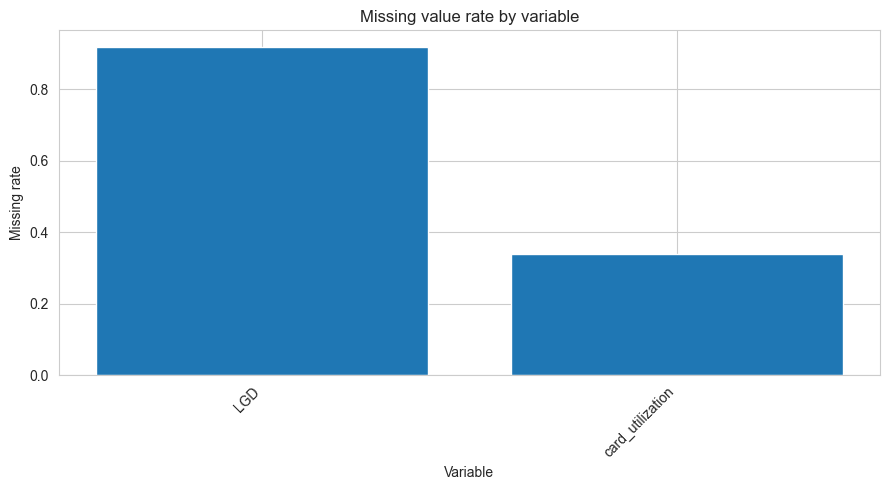


=== DATA QUALITY CHECKS ===

-- Allowed category checks --
employment_type: OK (no unexpected categories)
housing_status: OK (no unexpected categories)
region: OK (no unexpected categories)
loan_purpose: OK (no unexpected categories)
age: 22 values violate plausibility rule
income: 61 values violate plausibility rule
card_utilization: 86 values violate plausibility rule
LGD: 3 values violate plausibility rule

=== UNIVARIATE DISTRIBUTIONS (NUMERIC) ===


c:\Users\stefa\bads310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


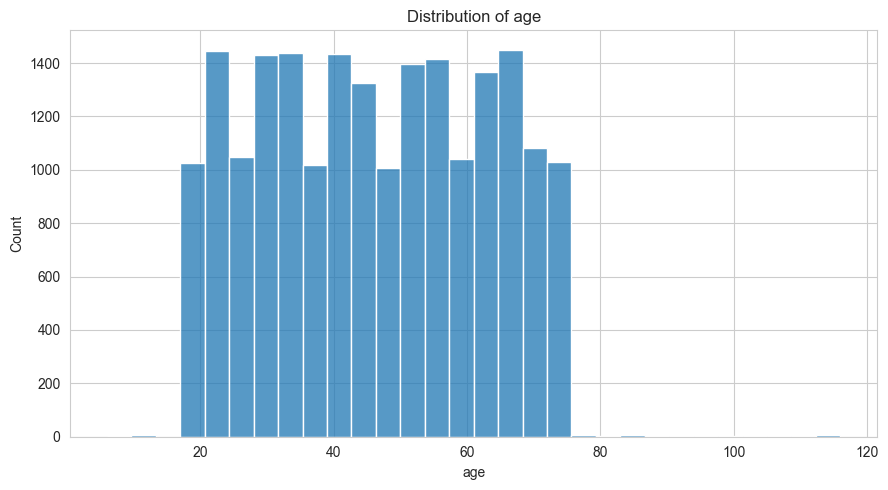

c:\Users\stefa\bads310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


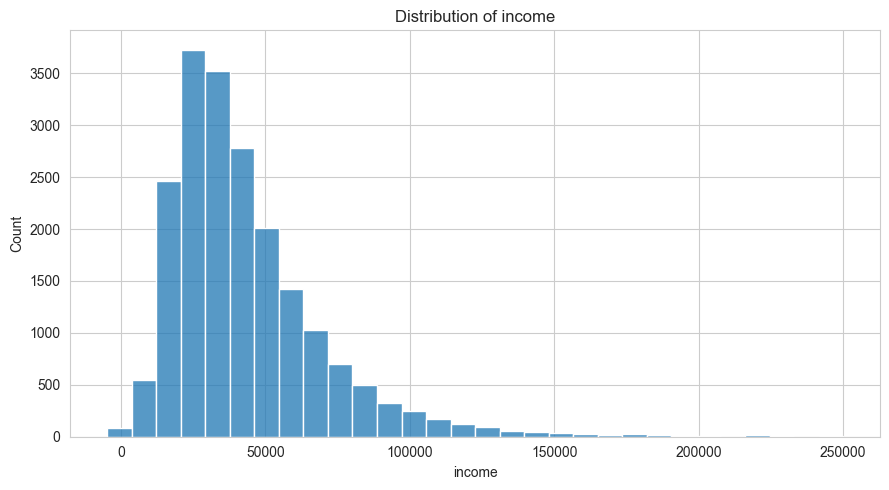

c:\Users\stefa\bads310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


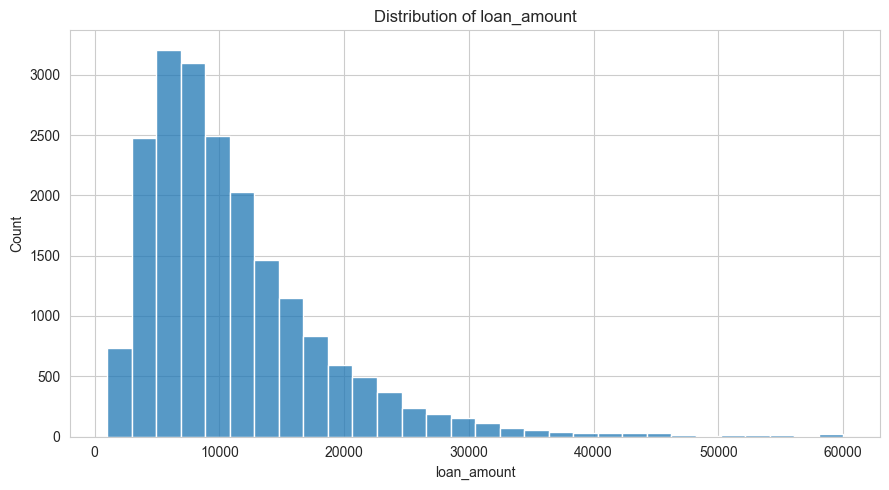

c:\Users\stefa\bads310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


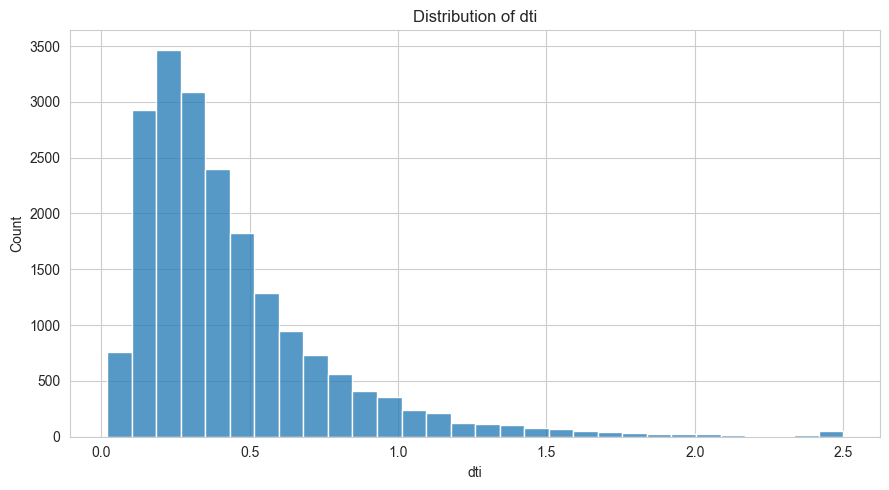

c:\Users\stefa\bads310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


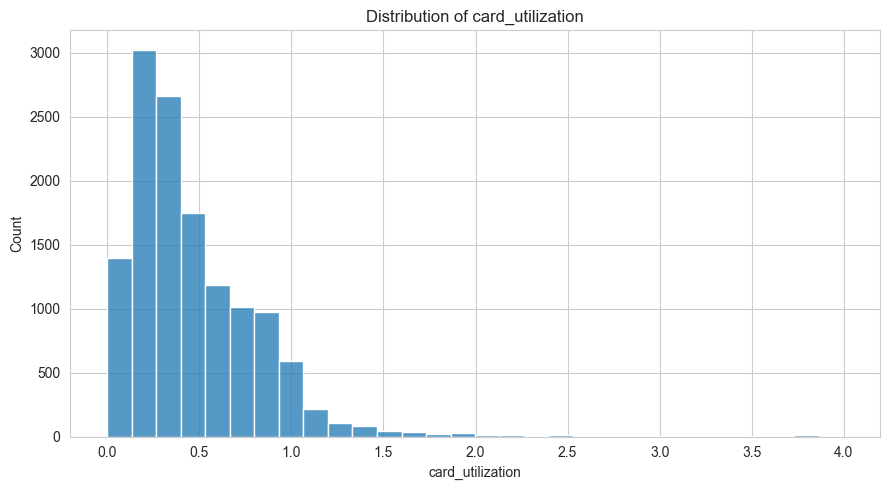

c:\Users\stefa\bads310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


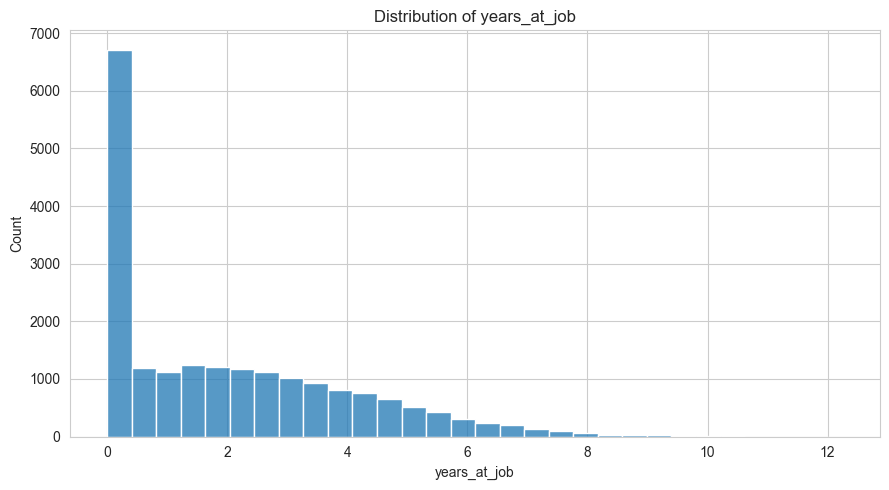

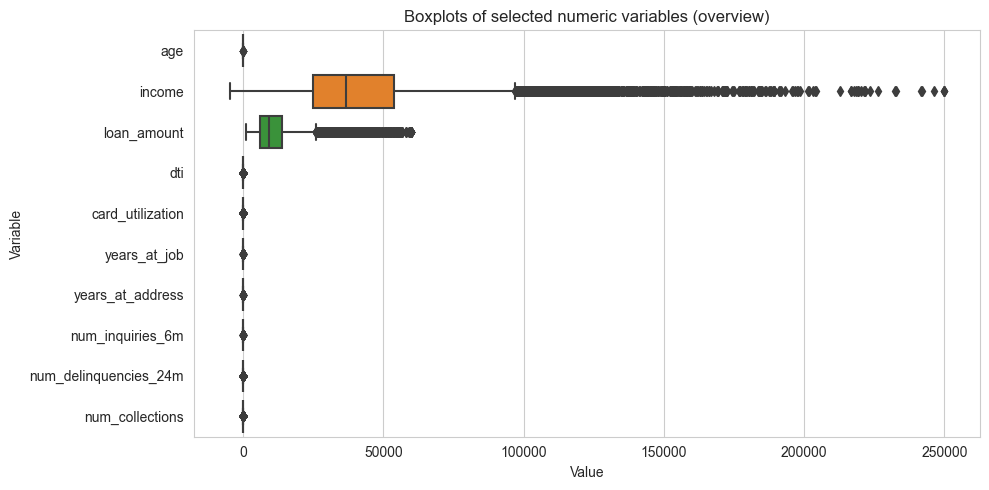


=== UNIVARIATE DISTRIBUTIONS (CATEGORICAL) ===


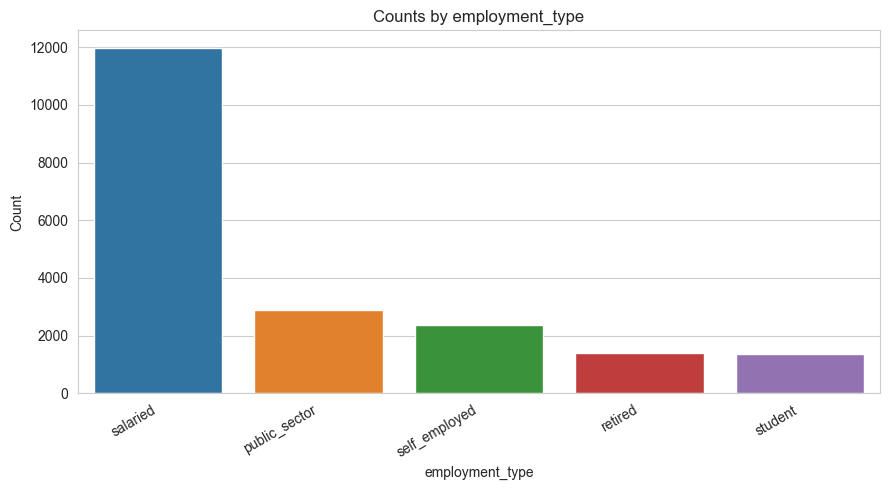

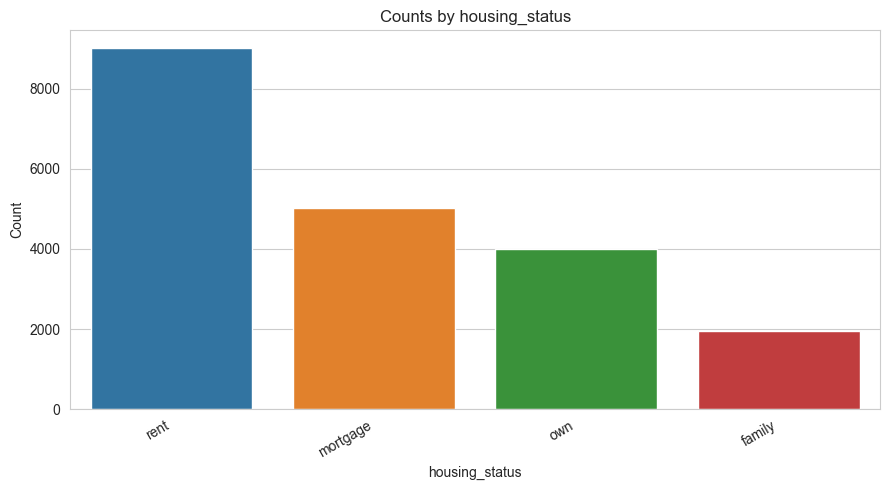

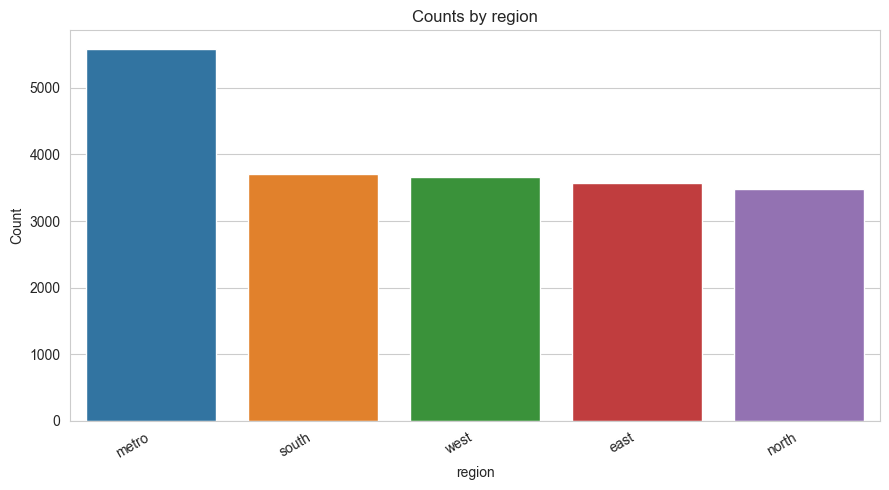

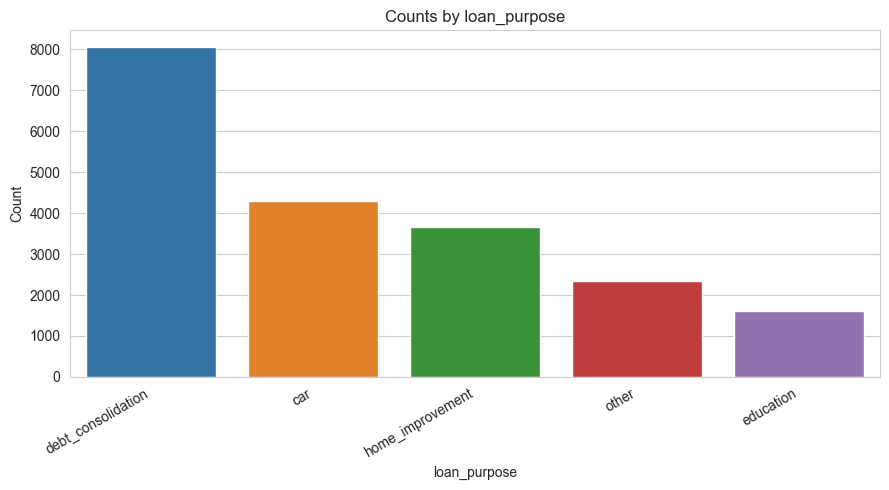


=== RELATIONSHIPS WITH OUTCOMES ===


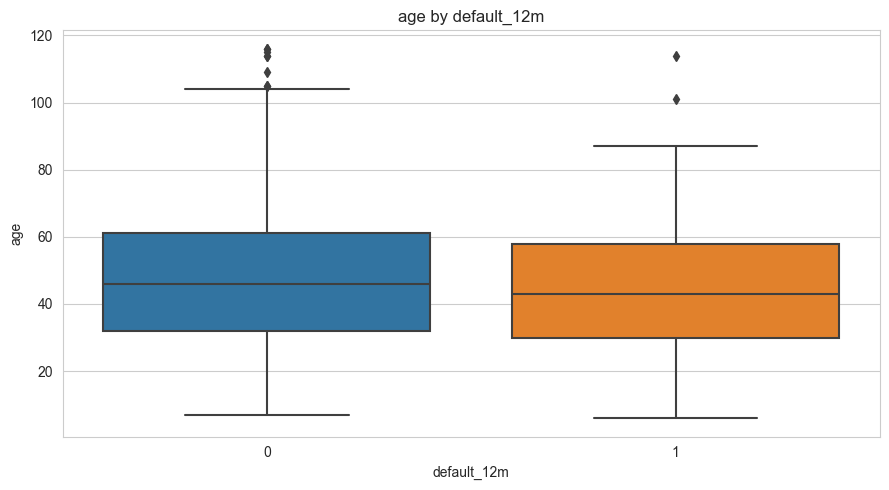

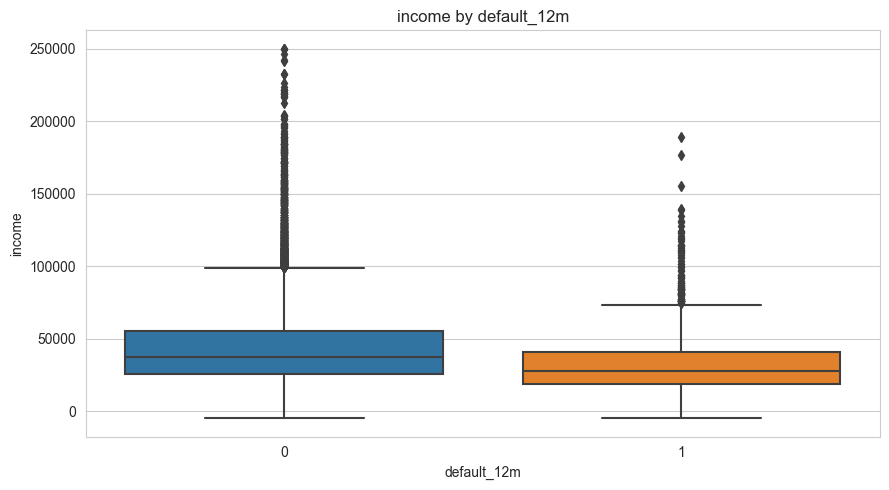

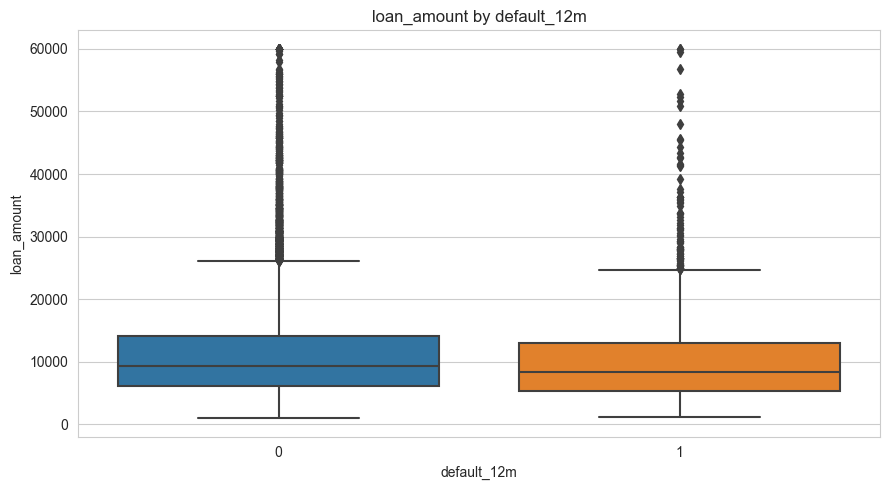

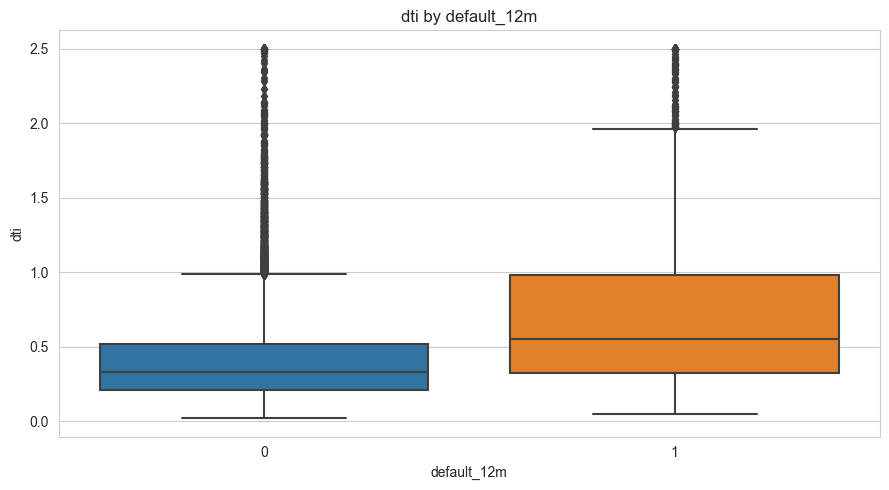

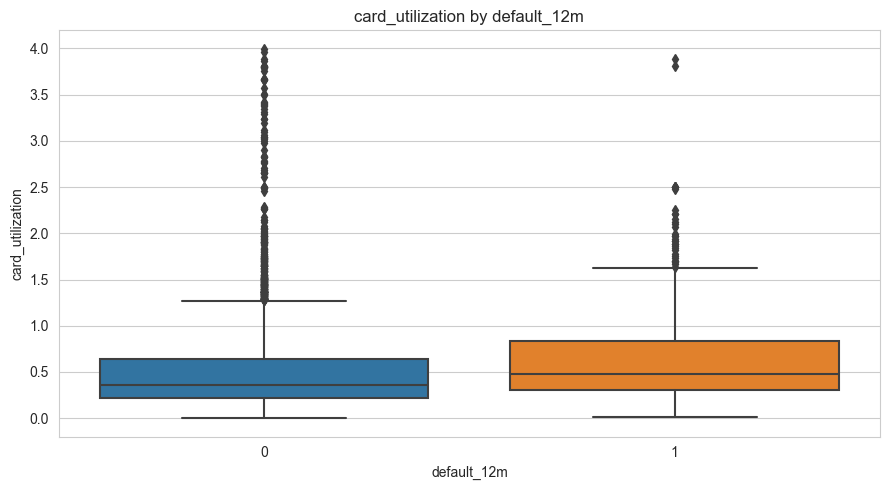

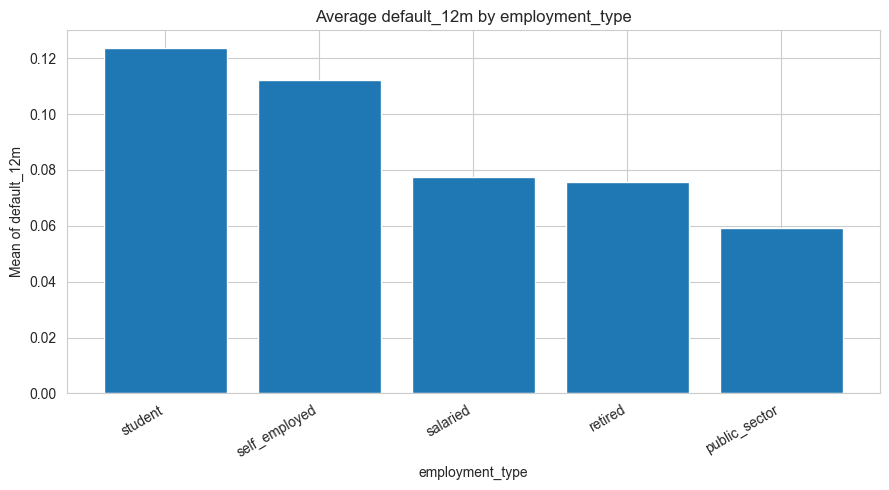

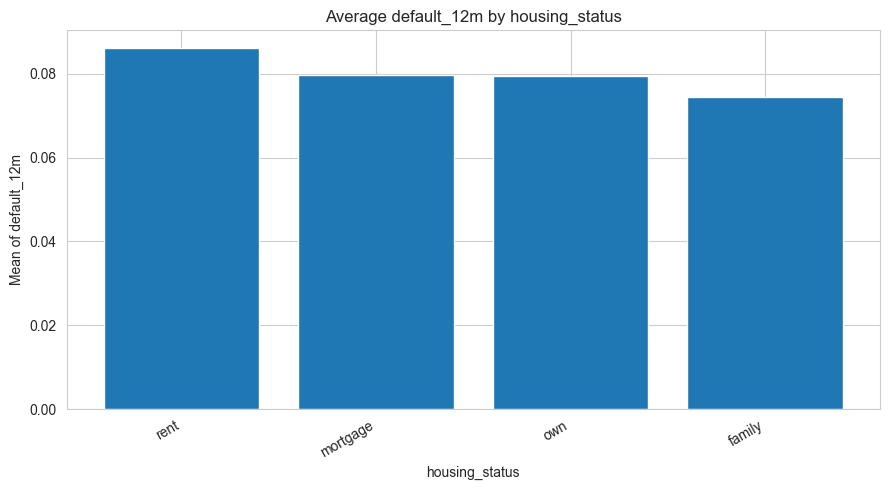

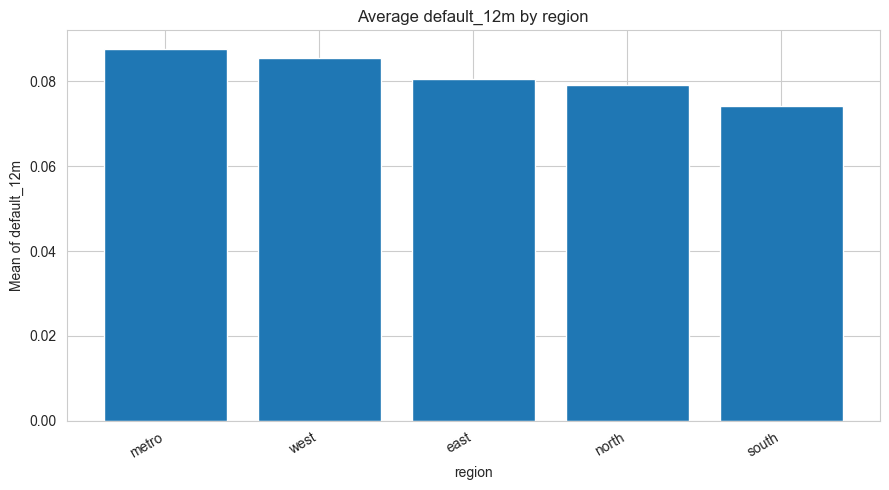

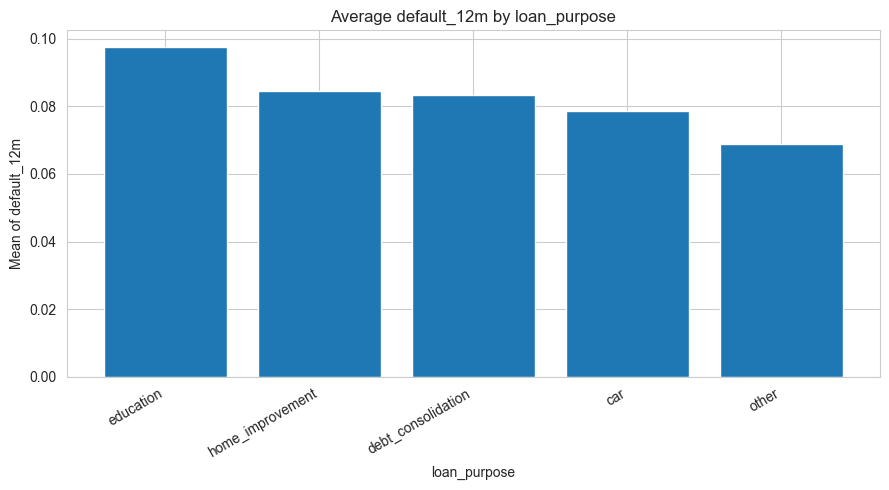


LGD is observed for 1640 rows (8.20% of dataset).


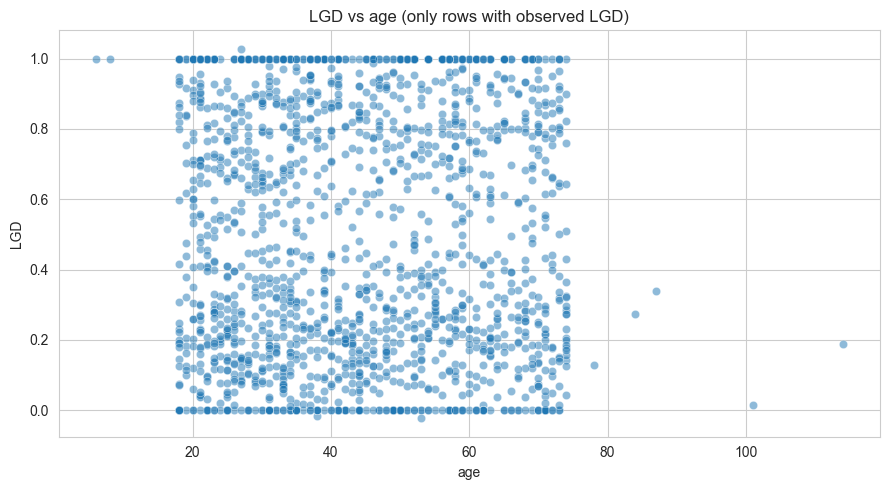

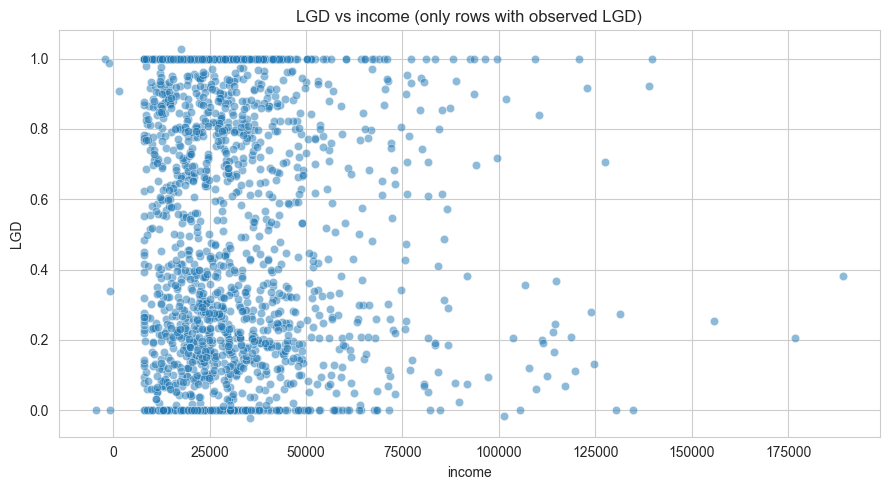

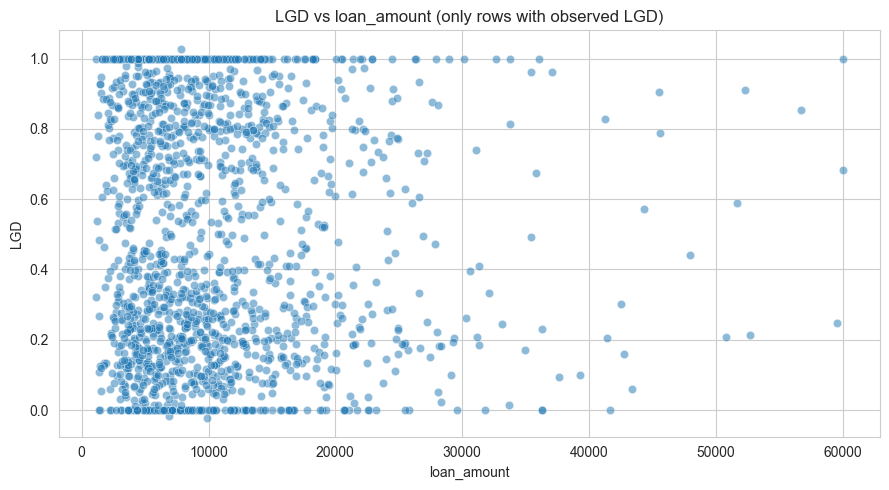

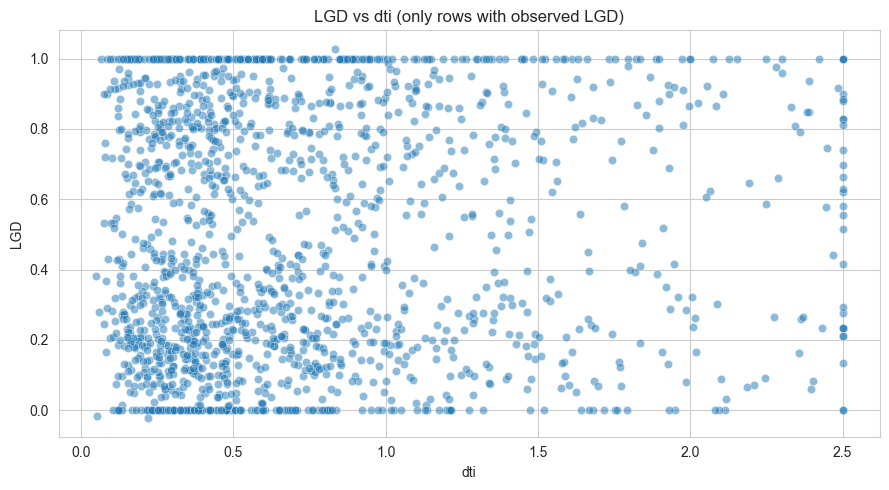

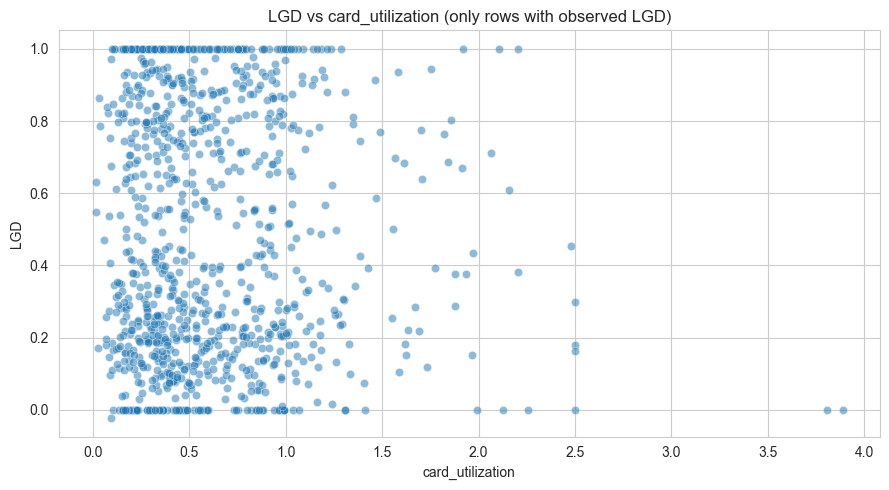


=== NUMERIC ASSOCIATIONS (CORRELATIONS) ===


,age,card_utilization,dti,income,loan_amount,num_collections,num_delinquencies_24m,num_inquiries_6m,years_at_address,years_at_job
age,1.00,-0.04,-0.15,0.22,0.08,-0.04,-0.05,0.01,0.47,0.32
card_utilization,-0.04,1.00,0.12,-0.06,-0.02,0.03,0.14,0.00,-0.00,-0.02
dti,-0.15,0.12,1.00,-0.51,-0.07,0.20,0.25,-0.01,-0.07,-0.08
income,0.22,-0.06,-0.51,1.00,0.33,-0.09,-0.13,-0.00,0.10,0.11
loan_amount,0.08,-0.02,-0.07,0.33,1.00,-0.03,-0.02,-0.01,0.03,0.04
num_collections,-0.04,0.03,0.20,-0.09,-0.03,1.00,0.06,0.01,-0.03,-0.04
num_delinquencies_24m,-0.05,0.14,0.25,-0.13,-0.02,0.06,1.00,0.01,-0.04,-0.04
num_inquiries_6m,0.01,0.00,-0.01,-0.00,-0.01,0.01,0.01,1.00,0.01,0.00
years_at_address,0.47,-0.00,-0.07,0.10,0.03,-0.03,-0.04,0.01,1.00,0.16
years_at_job,0.32,-0.02,-0.08,0.11,0.04,-0.04,-0.04,0.00,0.16,1.00


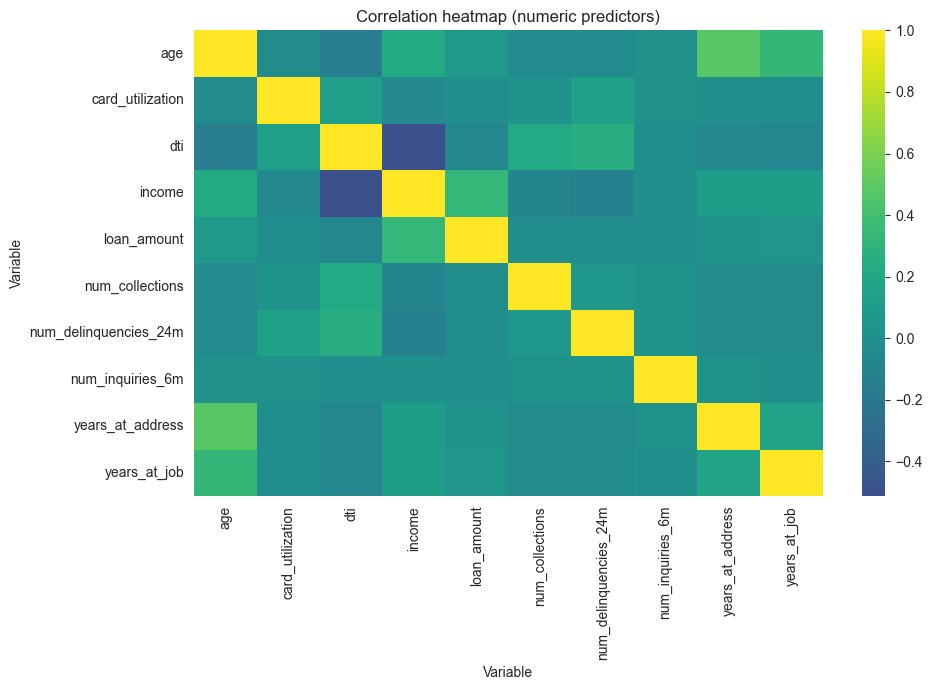


=== OUTLIER / EXTREME VALUE CHECK (IQR METHOD) ===


,variable,n,outliers,lower,upper
9,num_collections,20000,4107,0.00,0.00
3,dti,20000,1125,-0.28,1.04
1,income,20000,904,-18111.13,97063.49
2,loan_amount,20000,871,-5982.45,26094.50
8,num_delinquencies_24m,20000,332,-1.50,2.50
4,card_utilization,13206,312,-0.44,1.31
5,years_at_job,20000,90,-5.04,8.40
7,num_inquiries_6m,20000,82,-3.00,5.00
6,years_at_address,20000,63,-4.27,8.02
0,age,20000,10,-10.00,102.00



=== KEY FINDINGS (SUMMARY) ===
- LGD has missing values (91.8%).
- card_utilization has missing values (34.0%).
- Overall default rate: 8.2%.
- LGD is observed for 8.2% of rows (missing otherwise by definition).
- num_collections shows the most IQR-flagged extreme values (4107 observations).

=== OPTIONAL (NOT RUN): heavier but potentially informative steps ===
- If the dataset is large, avoid pairplots. If smaller, a pairplot of a few key numeric variables could be insightful.
- Consider stratified summaries by region or loan purpose if you want deeper segmentation insights.


In [ ]:
# GENERATED EDA CODE (ChatGPT 5.2) IN RESPONSE TO THE DEMO PROMPT 
# ==========================================
# EDA DEMO (Credit Risk Dataset)
# Assumptions:
# - A pandas DataFrame named `df` already exists in memory
# - Do NOT modify df; use df_eda for any transformations
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit cleaner (optional)
plt.rcParams["figure.figsize"] = (9, 5)
plt.rcParams["axes.grid"] = True

# Create a working copy (do not modify df)
df_eda = df.copy(deep=True)

# ==========================================
# 1) DATA OVERVIEW: structure, types, columns
# ==========================================
print("=== DATASET OVERVIEW ===")
print(f"Shape (rows, cols): {df_eda.shape}")
print("\nColumns:")
print(list(df_eda.columns))

print("\nData types:")
print(df_eda.dtypes)

print("\nInfo:")
df_eda.info()

print("\nFirst 5 rows:")
display(df_eda.head())

# ==========================================
# 2) VERIFY TYPES AGAINST DATA DICTIONARY
#    (Define expected types and categories)
# ==========================================

# Expected schema based on the provided data dictionary
schema = {
    # Outcomes
    "default_12m": {"kind": "binary"},
    "LGD": {"kind": "numeric"},
    "p_default_true": {"kind": "numeric"},
    # Applicant info
    "age": {"kind": "numeric"},
    "income": {"kind": "numeric"},
    "employment_type": {"kind": "categorical",
                        "allowed": ["salaried", "self_employed", "public_sector", "student", "retired"]},
    "housing_status": {"kind": "categorical",
                       "allowed": ["rent", "own", "mortgage", "family"]},
    "years_at_job": {"kind": "numeric"},
    "years_at_address": {"kind": "numeric"},
    "region": {"kind": "categorical",
               "allowed": ["north", "south", "east", "west", "metro"]},
    # Relationship
    "has_bank_account": {"kind": "binary"},
    # Loan characteristics
    "loan_purpose": {"kind": "categorical",
                     "allowed": ["debt_consolidation", "car", "home_improvement", "education", "other"]},
    "loan_amount": {"kind": "numeric"},
    "secured": {"kind": "binary"},
    "dti": {"kind": "numeric"},
    # Credit history
    "num_inquiries_6m": {"kind": "numeric"},
    "num_delinquencies_24m": {"kind": "numeric"},
    "num_collections": {"kind": "numeric"},
    "card_utilization": {"kind": "numeric"},
}

expected_cols = list(schema.keys())
missing_cols = [c for c in expected_cols if c not in df_eda.columns]
extra_cols = [c for c in df_eda.columns if c not in expected_cols]

print("\n=== SCHEMA CHECK ===")
print("Missing expected columns:", missing_cols if missing_cols else "None")
print("Extra columns not in dictionary:", extra_cols if extra_cols else "None")

# Identify numeric/categorical/binary fields (from the dictionary)
binary_cols = [c for c, meta in schema.items() if meta.get("kind") == "binary" and c in df_eda.columns]
categorical_cols = [c for c, meta in schema.items() if meta.get("kind") == "categorical" and c in df_eda.columns]
numeric_cols = [c for c, meta in schema.items() if meta.get("kind") == "numeric" and c in df_eda.columns]

# Identify potential identifier fields (heuristic: very high cardinality object/string, or unique values)
identifier_like = []
for c in df_eda.columns:
    if c in categorical_cols:
        continue
    if df_eda[c].dtype == "object":
        nunique = df_eda[c].nunique(dropna=True)
        if nunique > 0.8 * len(df_eda):
            identifier_like.append(c)
    # Also flag columns with near-unique numeric values (rare in synthetic credit data, but included for completeness)
    if np.issubdtype(df_eda[c].dtype, np.number):
        nunique = df_eda[c].nunique(dropna=True)
        if nunique > 0.95 * len(df_eda) and c not in numeric_cols:
            identifier_like.append(c)

print("\nField groups inferred from dictionary:")
print("Binary:", binary_cols)
print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)
print("Identifier-like (heuristic):", identifier_like if identifier_like else "None")

# Basic type sanity checks (binary columns should be 0/1)
print("\n=== BINARY VALUE CHECKS ===")
for c in binary_cols:
    vals = sorted(df_eda[c].dropna().unique().tolist())
    print(f"{c}: unique values = {vals}")

# ==========================================
# 3) SUMMARY STATS: numeric variables
# ==========================================
print("\n=== NUMERIC SUMMARY STATISTICS ===")
if numeric_cols:
    display(df_eda[numeric_cols].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).T)
else:
    print("No numeric columns detected from dictionary.")

# ==========================================
# 4) FREQUENCY DISTRIBUTIONS: categorical vars
# ==========================================
print("\n=== CATEGORICAL FREQUENCIES ===")
for c in categorical_cols:
    print(f"\n-- {c} --")
    freq = df_eda[c].value_counts(dropna=False)
    display(freq.to_frame("count").assign(pct=lambda x: x["count"] / x["count"].sum()).style.format({"pct": "{:.2%}"}))

# Also check: rare categories (e.g., <1%)
print("\n=== RARE CATEGORY CHECK (<1%) ===")
for c in categorical_cols:
    freq = df_eda[c].value_counts(normalize=True, dropna=False)
    rare = freq[freq < 0.01]
    if len(rare) > 0:
        print(f"{c}: rare levels")
        display(rare.to_frame("share").style.format({"share": "{:.2%}"}))

# ==========================================
# 5) MISSING VALUES
# ==========================================
print("\n=== MISSING VALUES ===")
missing = pd.DataFrame({
    "missing_count": df_eda.isna().sum(),
    "missing_pct": df_eda.isna().mean()
}).sort_values("missing_pct", ascending=False)

display(missing.style.format({"missing_pct": "{:.2%}"}))

# Plot missingness for variables with any missing values (lightweight)
missing_nonzero = missing[missing["missing_count"] > 0]
if len(missing_nonzero) > 0:
    plt.figure()
    plt.bar(missing_nonzero.index.astype(str), missing_nonzero["missing_pct"].values)
    plt.xticks(rotation=45, ha="right")
    plt.title("Missing value rate by variable")
    plt.xlabel("Variable")
    plt.ylabel("Missing rate")
    plt.tight_layout()
    plt.show()

# ==========================================
# 6) DATA QUALITY CHECKS
# ==========================================
print("\n=== DATA QUALITY CHECKS ===")

# Check allowed categories (if specified)
print("\n-- Allowed category checks --")
for c in categorical_cols:
    allowed = schema.get(c, {}).get("allowed", None)
    if allowed is not None:
        observed = set(df_eda[c].dropna().unique().tolist())
        unexpected = sorted(list(observed - set(allowed)))
        if unexpected:
            print(f"{c}: unexpected categories found: {unexpected}")
        else:
            print(f"{c}: OK (no unexpected categories)")

# Simple plausibility checks for key numeric fields (domain-informed but generic)
plausibility_rules = {
    "age": lambda s: (s >= 18) & (s <= 100),
    "income": lambda s: s >= 0,
    "years_at_job": lambda s: s >= 0,
    "years_at_address": lambda s: s >= 0,
    "loan_amount": lambda s: s > 0,
    "dti": lambda s: (s >= 0) & (s <= 5),  # generous upper bound
    "num_inquiries_6m": lambda s: s >= 0,
    "num_delinquencies_24m": lambda s: s >= 0,
    "num_collections": lambda s: s >= 0,
    "card_utilization": lambda s: (s >= 0) & (s <= 2),  # utilization can exceed 1 but usually not extreme
    "LGD": lambda s: (s >= 0) & (s <= 1),
    "p_default_true": lambda s: (s >= 0) & (s <= 1),
}

quality_issues = []
for col, rule in plausibility_rules.items():
    if col in df_eda.columns and np.issubdtype(df_eda[col].dtype, np.number):
        mask = df_eda[col].notna()
        if mask.any():
            ok = rule(df_eda.loc[mask, col])
            n_bad = int((~ok).sum())
            if n_bad > 0:
                quality_issues.append((col, n_bad))
                print(f"{col}: {n_bad} values violate plausibility rule")

if not quality_issues:
    print("No obvious plausibility violations detected (based on simple rules).")

# ==========================================
# 7) UNIVARIATE DISTRIBUTIONS (key variables)
#    Keep it lightweight: a few well-chosen plots
# ==========================================

# Select a small set of "key" numeric variables (ignore outcomes for now)
key_numeric = [c for c in ["age", "income", "loan_amount", "dti", "card_utilization",
                          "years_at_job", "years_at_address",
                          "num_inquiries_6m", "num_delinquencies_24m", "num_collections"]
               if c in df_eda.columns]

print("\n=== UNIVARIATE DISTRIBUTIONS (NUMERIC) ===")
for c in key_numeric[:6]:  # limit to avoid too many plots
    plt.figure()
    sns.histplot(df_eda[c], bins=30, kde=False)
    plt.title(f"Distribution of {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# A compact boxplot overview for numeric keys (lightweight)
if len(key_numeric) > 0:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_eda[key_numeric], orient="h")
    plt.title("Boxplots of selected numeric variables (overview)")
    plt.xlabel("Value")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

print("\n=== UNIVARIATE DISTRIBUTIONS (CATEGORICAL) ===")
for c in categorical_cols:
    plt.figure()
    order = df_eda[c].value_counts(dropna=False).index
    sns.countplot(data=df_eda, x=c, order=order)
    plt.title(f"Counts by {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

# ==========================================
# 8) RELATIONSHIPS: predictors vs outcomes
# ==========================================

# Outcomes from dictionary (if present)
outcome_bin = "default_12m" if "default_12m" in df_eda.columns else None
outcome_lgd = "LGD" if "LGD" in df_eda.columns else None

print("\n=== RELATIONSHIPS WITH OUTCOMES ===")

# 8a) Numeric predictors vs binary outcome: compare distributions by class
if outcome_bin and len(key_numeric) > 0:
    for c in key_numeric[:5]:  # limit plots
        if c == outcome_bin:
            continue
        plt.figure()
        sns.boxplot(data=df_eda, x=outcome_bin, y=c)
        plt.title(f"{c} by {outcome_bin}")
        plt.xlabel(outcome_bin)
        plt.ylabel(c)
        plt.tight_layout()
        plt.show()

# 8b) Categorical predictors vs binary outcome: default rate by category
if outcome_bin and len(categorical_cols) > 0:
    for c in categorical_cols:
        tmp = (
            df_eda[[c, outcome_bin]]
            .dropna()
            .groupby(c)[outcome_bin]
            .mean()
            .sort_values(ascending=False)
        )
        plt.figure()
        plt.bar(tmp.index.astype(str), tmp.values)
        plt.title(f"Average {outcome_bin} by {c}")
        plt.xlabel(c)
        plt.ylabel(f"Mean of {outcome_bin}")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.show()

# 8c) Numeric predictors vs LGD (only where LGD observed)
# Note: LGD is defined only for defaults; keep analysis simple and explicit
if outcome_lgd and len(key_numeric) > 0:
    df_lgd = df_eda[df_eda[outcome_lgd].notna()].copy()
    print(f"\nLGD is observed for {len(df_lgd)} rows ({len(df_lgd)/len(df_eda):.2%} of dataset).")
    for c in [x for x in key_numeric if x != outcome_lgd][:5]:
        plt.figure()
        sns.scatterplot(data=df_lgd, x=c, y=outcome_lgd, alpha=0.5)
        plt.title(f"{outcome_lgd} vs {c} (only rows with observed LGD)")
        plt.xlabel(c)
        plt.ylabel(outcome_lgd)
        plt.tight_layout()
        plt.show()

# ==========================================
# 9) ASSOCIATIONS AMONG NUMERIC PREDICTORS
#    Correlation matrix (lightweight)
# ==========================================
print("\n=== NUMERIC ASSOCIATIONS (CORRELATIONS) ===")
numeric_for_corr = [c for c in numeric_cols if c not in ["LGD", "p_default_true"] and c in df_eda.columns]
# Include key numeric if schema missed them
numeric_for_corr = sorted(list(set(numeric_for_corr).union(set(key_numeric))))

if len(numeric_for_corr) >= 2:
    corr = df_eda[numeric_for_corr].corr(numeric_only=True)
    display(corr.style.format("{:.2f}"))

    plt.figure(figsize=(10, 7))
    sns.heatmap(corr, annot=False, cmap="viridis", center=0)
    plt.title("Correlation heatmap (numeric predictors)")
    plt.xlabel("Variable")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric predictors for correlation analysis.")

# ==========================================
# 10) OUTLIERS / EXTREMES (simple IQR-based flags)
# ==========================================
print("\n=== OUTLIER / EXTREME VALUE CHECK (IQR METHOD) ===")

def iqr_outlier_counts(series: pd.Series) -> dict:
    """Return simple IQR-based outlier counts and thresholds for a numeric series."""
    s = series.dropna()
    if len(s) < 10:
        return {"n": len(s), "outliers": np.nan, "lower": np.nan, "upper": np.nan}
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((s < lower) | (s > upper)).sum()
    return {"n": len(s), "outliers": int(outliers), "lower": float(lower), "upper": float(upper)}

outlier_table = []
for c in key_numeric:
    if c in df_eda.columns and np.issubdtype(df_eda[c].dtype, np.number):
        stats = iqr_outlier_counts(df_eda[c])
        outlier_table.append({"variable": c, **stats})

outlier_df = pd.DataFrame(outlier_table).sort_values("outliers", ascending=False)
display(outlier_df.style.format({"lower": "{:.2f}", "upper": "{:.2f}"}))

# ==========================================
# 11) SHORT SUMMARY (max 8 bullets)
# ==========================================
summary_bullets = []

# Missingness highlights
if len(missing_nonzero) > 0:
    top_missing = missing_nonzero.head(2)
    for var, row in top_missing.iterrows():
        summary_bullets.append(f"{var} has missing values ({row['missing_pct']:.1%}).")

# Default rate (if binary outcome exists)
if outcome_bin:
    default_rate = df_eda[outcome_bin].mean()
    summary_bullets.append(f"Overall default rate: {default_rate:.1%}.")

# LGD coverage
if outcome_lgd:
    lgd_obs = df_eda[outcome_lgd].notna().mean()
    summary_bullets.append(f"LGD is observed for {lgd_obs:.1%} of rows (missing otherwise by definition).")

# Rare categories
rare_notes = 0
for c in categorical_cols:
    freq = df_eda[c].value_counts(normalize=True, dropna=False)
    rare = freq[freq < 0.01]
    if len(rare) > 0 and rare_notes < 2:
        summary_bullets.append(f"{c} contains rare categories (<1% share), which may require grouping/handling.")
        rare_notes += 1

# Outlier note
if not outlier_df.empty and outlier_df["outliers"].notna().any():
    max_out = outlier_df["outliers"].max()
    max_var = outlier_df.loc[outlier_df["outliers"].idxmax(), "variable"]
    if max_out and max_out > 0:
        summary_bullets.append(f"{max_var} shows the most IQR-flagged extreme values ({max_out} observations).")

# Correlation note
if len(numeric_for_corr) >= 2:
    # Find a strong absolute correlation (excluding self-corr)
    corr_abs = corr.abs().copy()
    np.fill_diagonal(corr_abs.values, 0)
    max_corr = corr_abs.to_numpy().max()
    if max_corr >= 0.6:
        i, j = np.unravel_index(np.argmax(corr_abs.to_numpy()), corr_abs.shape)
        v1, v2 = corr_abs.index[i], corr_abs.columns[j]
        summary_bullets.append(f"Some numeric predictors are strongly associated (e.g., |corr({v1},{v2})| ≈ {max_corr:.2f}).")

# Cap at 8 bullets
summary_bullets = summary_bullets[:8]

print("\n=== KEY FINDINGS (SUMMARY) ===")
for b in summary_bullets:
    print(f"- {b}")

# ==========================================
# Note on heavy computation (suggest only)
# ==========================================
print("\n=== OPTIONAL (NOT RUN): heavier but potentially informative steps ===")
print("- If the dataset is large, avoid pairplots. If smaller, a pairplot of a few key numeric variables could be insightful.")
print("- Consider stratified summaries by region or loan purpose if you want deeper segmentation insights.")

## Data Preparation (DPP)
The goal of the data preparation is to address potential data quality issue (e.g., identified during EDA) and to facilitate statistical / machine learning modeling. For example, many statistical methods cannot handle missing values. Linear regression is a popular example. Thus, addressing missing values is a standard dpp task.

We proceed as before: providing a template of a prompt to generate dpp code, which we will discuss and complete in class. 
 
>Remark: We assume you execute the dpp prompt in the same chat session as the previous EDA prompt. Doing so ensures that the LLM has stored information on the dataset and the results of the EDA. 

### DPP Prompt Engineering

### LLM-Generated result

In [ ]:
# copy your generated dpp codes here

### SOLUTION

#### DPP prompt
The below prompt is provided for demonstration. While it worked well in various test cases, a potentially severe issue is that we leave it to the LLM to tailor DPP steps to EDA findings.    

#### Generated DPP Code (ChatGPT 5.2)

In [ ]:
# ==========================================
# DATA PREPARATION DEMO (Credit Risk Dataset)
# - Assumes df already exists
# - Do NOT modify df; work on df_prep
# - Produces df_model (modeling-ready)
# ==========================================

import numpy as np
import pandas as pd

# For optional diagnostics/plots (kept lightweight)
import matplotlib.pyplot as plt

# ---------------------------
# 0) WORKING COPY + SETTINGS
# ---------------------------
df_prep = df.copy(deep=True)

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

print("=== STARTING DATA PREP ===")
print("Initial shape:", df_prep.shape)
print("\nInitial dtypes:")
print(df_prep.dtypes)

# ---------------------------
# 1) DEFINE ROLES FROM DICTIONARY
# ---------------------------
# Outcomes (do NOT use p_default_true as predictor; it's leakage/reference)
target_cols = ["default_12m", "LGD"]
leakage_or_reference_cols = ["p_default_true"]

binary_cols = ["default_12m", "has_bank_account", "secured"]
categorical_cols = ["employment_type", "housing_status", "region", "loan_purpose"]

numeric_cols = [
    "age", "income", "years_at_job", "years_at_address",
    "loan_amount", "dti",
    "num_inquiries_6m", "num_delinquencies_24m", "num_collections",
    "card_utilization",
    # LGD and p_default_true are outcomes/reference; keep separate
]

# Keep only columns that actually exist (robust if dataset differs slightly)
present = set(df_prep.columns)
binary_cols = [c for c in binary_cols if c in present]
categorical_cols = [c for c in categorical_cols if c in present]
numeric_cols = [c for c in numeric_cols if c in present]
target_cols = [c for c in target_cols if c in present]
leakage_or_reference_cols = [c for c in leakage_or_reference_cols if c in present]

print("\n=== VARIABLE GROUPS (based on dictionary) ===")
print("Targets:", target_cols)
print("Binary:", binary_cols)
print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)
print("Leakage/reference (to exclude from predictors):", leakage_or_reference_cols if leakage_or_reference_cols else "None")

# ---------------------------
# 2) BASIC DATA QUALITY: TYPES + CONSISTENT CODING
# ---------------------------
print("\n=== TYPE & CODING CHECKS ===")

# 2a) Binary columns: enforce 0/1 integers where possible
for c in binary_cols:
    # Convert booleans to int, and numeric strings to numeric where needed
    if df_prep[c].dtype == "bool":
        df_prep[c] = df_prep[c].astype(int)
    # Try numeric conversion for object columns
    if df_prep[c].dtype == "object":
        df_prep[c] = pd.to_numeric(df_prep[c], errors="coerce")

    # If values look like 0/1 (possibly floats), coerce to Int64
    uniq = sorted(df_prep[c].dropna().unique().tolist())
    print(f"{c}: unique non-missing values (pre): {uniq[:10]}{'...' if len(uniq) > 10 else ''}")

    # Normalize common binary codings if necessary
    df_prep[c] = df_prep[c].where(df_prep[c].isna(), df_prep[c].astype(float))
    df_prep[c] = df_prep[c].where(df_prep[c].isna(), np.round(df_prep[c]).astype(int))

    # Safety: set any non {0,1} to NaN (then will be handled downstream)
    df_prep.loc[~df_prep[c].isin([0, 1]) & df_prep[c].notna(), c] = np.nan
    df_prep[c] = df_prep[c].astype("Int64")

    uniq2 = sorted(df_prep[c].dropna().unique().tolist())
    print(f"{c}: unique non-missing values (post): {uniq2}")

# 2b) Categorical columns: ensure dtype "category" for clarity
for c in categorical_cols:
    df_prep[c] = df_prep[c].astype("category")

# 2c) Numeric columns: coerce to numeric
for c in numeric_cols:
    df_prep[c] = pd.to_numeric(df_prep[c], errors="coerce")

# ---------------------------
# 3) PLAUSIBILITY CHECKS (implausible -> NaN)
# ---------------------------
print("\n=== PLAUSIBILITY RULES (invalid values -> set to NaN) ===")

rules = {
    "age": lambda s: (s >= 18) & (s <= 100),
    "income": lambda s: s >= 0,
    "years_at_job": lambda s: s >= 0,
    "years_at_address": lambda s: s >= 0,
    "loan_amount": lambda s: s > 0,
    "dti": lambda s: (s >= 0) & (s <= 5),           # generous
    "num_inquiries_6m": lambda s: s >= 0,
    "num_delinquencies_24m": lambda s: s >= 0,
    "num_collections": lambda s: s >= 0,
    "card_utilization": lambda s: (s >= 0) & (s <= 2),  # generous
}

for col, rule in rules.items():
    if col in df_prep.columns:
        s = df_prep[col]
        mask = s.notna()
        if mask.any():
            ok = rule(s[mask])
            n_bad = int((~ok).sum())
            if n_bad > 0:
                print(f"{col}: {n_bad} implausible values set to NaN")
                df_prep.loc[mask & (~rule(df_prep[col])), col] = np.nan

# Note: LGD is a target and can be missing by definition (non-defaults). We do not impute it here.

# ---------------------------
# 4) MISSING VALUE REPORT (before handling)
# ---------------------------
print("\n=== MISSINGNESS (BEFORE) ===")
missing_before = pd.DataFrame({
    "missing_count": df_prep.isna().sum(),
    "missing_pct": df_prep.isna().mean()
}).sort_values("missing_pct", ascending=False)

display(missing_before.style.format({"missing_pct": "{:.2%}"}))

# ---------------------------
# 5) MISSING VALUE HANDLING (predictors only)
#    - Numeric: median imputation + missing indicator where useful
#    - Categorical: explicit 'missing' level
#    - Binary: mode imputation (most frequent)
# ---------------------------
print("\n=== MISSING VALUE HANDLING (PREDICTORS) ===")

# Define predictor candidates: all fields except targets + leakage/reference
excluded = set(target_cols + leakage_or_reference_cols)

# Remove any identifier-like columns if present (heuristic)
identifier_like = []
for c in df_prep.columns:
    if c in excluded:
        continue
    if df_prep[c].dtype == "object":
        nunique = df_prep[c].nunique(dropna=True)
        if nunique > 0.9 * len(df_prep):
            identifier_like.append(c)

if identifier_like:
    print("Identifier-like columns detected and excluded from predictors:", identifier_like)
    excluded.update(identifier_like)

# Predictor groups (only those not excluded)
X_num = [c for c in numeric_cols if c in df_prep.columns and c not in excluded]
X_cat = [c for c in categorical_cols if c in df_prep.columns and c not in excluded]
X_bin = [c for c in binary_cols if c in df_prep.columns and c not in excluded and c != "default_12m"]  # don't treat target as predictor

print("Predictor candidates (numeric):", X_num)
print("Predictor candidates (categorical):", X_cat)
print("Predictor candidates (binary):", X_bin)

# 5a) Numeric: add missing indicators for variables with missingness
num_missing_indicators = []
for c in X_num:
    if df_prep[c].isna().any():
        ind = f"{c}__missing"
        df_prep[ind] = df_prep[c].isna().astype(int)
        num_missing_indicators.append(ind)
        # Median impute
        med = df_prep[c].median(skipna=True)
        df_prep[c] = df_prep[c].fillna(med)

# 5b) Categorical: add 'missing' category and fill
for c in X_cat:
    # Ensure category dtype
    if not pd.api.types.is_categorical_dtype(df_prep[c]):
        df_prep[c] = df_prep[c].astype("category")
    if df_prep[c].isna().any():
        df_prep[c] = df_prep[c].cat.add_categories(["missing"]).fillna("missing")

# 5c) Binary predictors: mode impute
for c in X_bin:
    if df_prep[c].isna().any():
        mode = df_prep[c].mode(dropna=True)
        fill = int(mode.iloc[0]) if len(mode) > 0 else 0
        df_prep[c] = df_prep[c].fillna(fill).astype(int)

print("Added numeric missing indicators:", num_missing_indicators if num_missing_indicators else "None")

# ---------------------------
# 6) OUTLIERS / EXTREMES (winsorize numeric predictors)
#    Keep simple + interpretable: cap at 1st/99th percentiles
# ---------------------------
print("\n=== OUTLIER HANDLING (WINSORIZATION ON NUMERIC PREDICTORS) ===")

winsor_limits = (0.01, 0.99)
winsor_applied = []
for c in X_num:
    s = df_prep[c]
    if s.notna().sum() >= 30:
        lo = s.quantile(winsor_limits[0])
        hi = s.quantile(winsor_limits[1])
        df_prep[c] = s.clip(lower=lo, upper=hi)
        winsor_applied.append((c, lo, hi))

print(f"Winsorized {len(winsor_applied)} numeric predictors at {winsor_limits[0]:.0%}/{winsor_limits[1]:.0%} percentiles.")
if winsor_applied:
    display(pd.DataFrame(winsor_applied, columns=["variable", "cap_low", "cap_high"]).head(10))

# ---------------------------
# 7) OPTIONAL: SIMPLE SKEWNESS-AWARE TRANSFORMS (lightweight)
#    Add log1p features for highly skewed positive variables; keep originals for interpretability
# ---------------------------
print("\n=== SKEWNESS CHECK (OPTIONAL FEATURE AUGMENTATION) ===")

skewed_added = []
for c in ["income", "loan_amount"]:
    if c in X_num and (df_prep[c] > 0).all():
        skew = df_prep[c].skew()
        if pd.notna(skew) and skew > 1.0:
            newc = f"log1p_{c}"
            df_prep[newc] = np.log1p(df_prep[c])
            skewed_added.append((c, float(skew), newc))

if skewed_added:
    print("Added log features for skewed variables:")
    display(pd.DataFrame(skewed_added, columns=["variable", "skewness", "added_feature"]))
else:
    print("No log features added (either not skewed enough or not strictly positive).")

# ---------------------------
# 8) ENCODING CATEGORICALS (one-hot for regression models)
# ---------------------------
print("\n=== ENCODING CATEGORICAL VARIABLES ===")

# One-hot encode; drop_first=True avoids perfect multicollinearity in linear regression
df_X = df_prep[X_num + X_bin + num_missing_indicators + [t for _, _, t in skewed_added]].copy()

if X_cat:
    df_cat = pd.get_dummies(df_prep[X_cat], drop_first=True, dtype=int)
    df_X = pd.concat([df_X, df_cat], axis=1)

print("Predictor matrix shape after encoding:", df_X.shape)

# ---------------------------
# 9) ASSEMBLE FINAL MODELING DATASET
#    - Keep targets alongside predictors
#    - Exclude leakage/reference variable(s) from predictors
#    - Ensure no missing values in predictors
# ---------------------------
print("\n=== ASSEMBLING df_model ===")

df_model = df_X.copy()

# Attach targets (as-is; do not impute targets)
for t in target_cols:
    df_model[t] = df_prep[t]

# Ensure default_12m is numeric if present
if "default_12m" in df_model.columns:
    df_model["default_12m"] = pd.to_numeric(df_model["default_12m"], errors="coerce")

# Final checks
print("df_model shape (with targets):", df_model.shape)

missing_predictors = df_model.drop(columns=[c for c in target_cols if c in df_model.columns], errors="ignore").isna().mean()
any_missing_pred = (missing_predictors > 0).any()

print("\nMissingness in predictors after prep (should be 0):")
display(missing_predictors[missing_predictors > 0].to_frame("missing_rate") if any_missing_pred else pd.DataFrame({"missing_rate": []}))

if any_missing_pred:
    print("\nWARNING: Some predictors still have missing values. Investigate the columns above.")
else:
    print("\nOK: No missing values in predictors.")

print("\nFirst 5 rows of df_model:")
display(df_model.head())

# ---------------------------
# 10) KEY INTERMEDIATE CHECKS (variable groups)
# ---------------------------
print("\n=== FINAL VARIABLE GROUPS ===")
print(f"Number of predictors: {df_X.shape[1]}")
print("Targets included:", [t for t in target_cols if t in df_model.columns])
print("\nPreview of predictor columns:")
print(list(df_X.columns)[:30], "..." if df_X.shape[1] > 30 else "")

# ---------------------------
# 11) SHORT SUMMARY (max 8 bullets)
# ---------------------------
summary = []

# 1) Starting vs final shape
summary.append(f"Rows unchanged: {df.shape[0]} → {df_model.shape[0]}; predictors after encoding: {df_X.shape[1]}.")

# 2) Missingness handled
n_ind = len(num_missing_indicators)
if n_ind > 0:
    summary.append(f"Numeric missingness handled via median imputation + {n_ind} missing-indicator(s).")
else:
    summary.append("No numeric missingness indicators were needed (or no numeric missingness detected).")

# 3) Categorical encoding
if X_cat:
    summary.append(f"Categorical variables one-hot encoded (drop_first=True) for regression compatibility.")
else:
    summary.append("No categorical predictors detected for encoding.")

# 4) Outliers
if winsor_applied:
    summary.append(f"Numeric predictors winsorized at 1st/99th percentiles to reduce impact of extremes.")

# 5) Skewness
if skewed_added:
    added = ", ".join([a[2] for a in skewed_added])
    summary.append(f"Added log1p features for skewed positives: {added} (originals retained).")

# 6) Leakage/reference
if leakage_or_reference_cols:
    summary.append(f"Excluded reference/leakage columns from predictors: {', '.join(leakage_or_reference_cols)}.")

# 7) Targets
if "LGD" in target_cols:
    lgd_obs = df_model["LGD"].notna().mean()
    summary.append(f"LGD kept as target with missingness by definition (observed for {lgd_obs:.1%} of rows).")

if "default_12m" in target_cols:
    dr = df_model["default_12m"].mean()
    summary.append(f"default_12m kept as target; overall default rate ≈ {dr:.1%} (if coded 0/1).")

summary = summary[:8]

print("\n=== KEY FINDINGS (SUMMARY) ===")
for b in summary:
    print(f"- {b}")

print("\n=== DATA PREP COMPLETE ===")

=== STARTING DATA PREP ===
Initial shape: (20000, 19)

Initial dtypes:
age                        int32
income                   float64
employment_type           object
housing_status            object
years_at_job             float64
years_at_address         float64
region                    object
has_bank_account           int32
loan_purpose              object
loan_amount              float64
secured                    int32
dti                      float64
num_inquiries_6m           int32
num_delinquencies_24m      int64
num_collections            int64
card_utilization         float64
p_default_true           float64
default_12m                int32
LGD                      float64
dtype: object

=== VARIABLE GROUPS (based on dictionary) ===
Targets: ['default_12m', 'LGD']
Binary: ['default_12m', 'has_bank_account', 'secured']
Categorical: ['employment_type', 'housing_status', 'region', 'loan_purpose']
Numeric: ['age', 'income', 'years_at_job', 'years_at_address', 'loan_amount',

,missing_count,missing_pct
LGD,18360,91.80%
card_utilization,6880,34.40%
income,61,0.30%
age,22,0.11%
years_at_job,0,0.00%
years_at_address,0,0.00%
region,0,0.00%
has_bank_account,0,0.00%
loan_purpose,0,0.00%
housing_status,0,0.00%



=== MISSING VALUE HANDLING (PREDICTORS) ===
Predictor candidates (numeric): ['age', 'income', 'years_at_job', 'years_at_address', 'loan_amount', 'dti', 'num_inquiries_6m', 'num_delinquencies_24m', 'num_collections', 'card_utilization']
Predictor candidates (categorical): ['employment_type', 'housing_status', 'region', 'loan_purpose']
Predictor candidates (binary): ['has_bank_account', 'secured']
Added numeric missing indicators: ['age__missing', 'income__missing', 'card_utilization__missing']

=== OUTLIER HANDLING (WINSORIZATION ON NUMERIC PREDICTORS) ===
Winsorized 10 numeric predictors at 1%/99% percentiles.


C:\Users\stefa\AppData\Local\Temp\ipykernel_37412\1437542788.py:187: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df_prep[c]):


,variable,cap_low,cap_high
0,age,18.000000,74.000000
1,income,9532.061500,142586.356200
2,years_at_job,0.000000,7.520100
3,years_at_address,0.000000,7.090000
4,loan_amount,2076.594500,38721.891400
5,dti,0.072100,1.759941
6,num_inquiries_6m,0.000000,5.000000
7,num_delinquencies_24m,0.000000,3.000000
8,num_collections,0.000000,2.000000
9,card_utilization,0.043499,1.348617



=== SKEWNESS CHECK (OPTIONAL FEATURE AUGMENTATION) ===
Added log features for skewed variables:


,variable,skewness,added_feature
0,income,1.486692,log1p_income
1,loan_amount,1.514896,log1p_loan_amount



=== ENCODING CATEGORICAL VARIABLES ===
Predictor matrix shape after encoding: (20000, 32)

=== ASSEMBLING df_model ===
df_model shape (with targets): (20000, 34)

Missingness in predictors after prep (should be 0):


,missing_rate



OK: No missing values in predictors.

First 5 rows of df_model:


,age,income,years_at_job,years_at_address,loan_amount,dti,num_inquiries_6m,num_delinquencies_24m,num_collections,card_utilization,has_bank_account,secured,age__missing,income__missing,card_utilization__missing,log1p_income,log1p_loan_amount,employment_type_retired,employment_type_salaried,employment_type_self_employed,employment_type_student,housing_status_mortgage,housing_status_own,housing_status_rent,region_metro,region_north,region_south,region_west,loan_purpose_debt_consolidation,loan_purpose_education,loan_purpose_home_improvement,loan_purpose_other,default_12m,LGD
0,71.0,45918.54,1.25,4.34,10309.08,0.2371,3,0,0,0.6523,1,0,0,0,0,10.734646,9.240877,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,NaN
1,53.0,96658.42,2.16,2.76,5041.69,0.0812,1,0,0,0.3697,0,0,0,0,1,11.478949,8.525695,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,NaN
2,56.0,67629.73,2.60,1.18,18380.34,0.1816,3,2,0,0.9126,1,0,0,0,0,11.121818,9.819091,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1.0
3,69.0,32202.17,4.54,7.06,8345.62,0.2102,1,0,0,0.3697,0,0,0,0,1,10.379820,9.029612,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,NaN
4,50.0,41398.81,3.67,0.00,9670.56,0.2213,0,0,0,0.3020,1,0,0,0,0,10.631032,9.176945,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,NaN



=== FINAL VARIABLE GROUPS ===
Number of predictors: 32
Targets included: ['default_12m', 'LGD']

Preview of predictor columns:
['age', 'income', 'years_at_job', 'years_at_address', 'loan_amount', 'dti', 'num_inquiries_6m', 'num_delinquencies_24m', 'num_collections', 'card_utilization', 'has_bank_account', 'secured', 'age__missing', 'income__missing', 'card_utilization__missing', 'log1p_income', 'log1p_loan_amount', 'employment_type_retired', 'employment_type_salaried', 'employment_type_self_employed', 'employment_type_student', 'housing_status_mortgage', 'housing_status_own', 'housing_status_rent', 'region_metro', 'region_north', 'region_south', 'region_west', 'loan_purpose_debt_consolidation', 'loan_purpose_education'] ...

=== KEY FINDINGS (SUMMARY) ===
- Rows unchanged: 20000 → 20000; predictors after encoding: 32.
- Numeric missingness handled via median imputation + 3 missing-indicator(s).
- Categorical variables one-hot encoded (drop_first=True) for regression compatibility.
- N

## Linear Regression Model
Linear regression is perhaps the most widely used statistical method in empirical research. A key learning goal of this exercise is to stress the subtle differences between an *explanatory* and a *predictive* model. Linear regression supports both, explanatory and predictive modeling. Traditionally, using linear regression for explanatory modeling is more common.   

Below, we provide a working example of running linear regression in Python using the `statsmodels` library. Unlike the famous `sklearn` library, the *go to library* for machine learning in Python, the `statsmodels` library focuses on explanatory modeling. 

The code assume a prepared *ready-to-use* version of the dataset is stored in a variable `df_model`. As dependent variable, we use `LGD`, which is defined only for defaulted loans. Therefore, the code includes a filtering step to select only the relevant subset of the data for modeling.

In [65]:
import statsmodels.api as sm

# ---------------------------
# 1) DEFINE TARGET (y)
# ---------------------------
# LGD is defined only for defaulted loans → restrict to observed LGD
if "LGD" not in df_model.columns:
    raise ValueError("LGD not found in df_model.")

df_lgd = df_model[df_model["LGD"].notna()].copy()
print("Rows with observed LGD:", df_lgd.shape[0])

y = df_lgd["LGD"].astype(np.float64)  # ensure numeric target

# ---------------------------
# 2) DEFINE PREDICTORS (X)
# ---------------------------
# Exclude:
# - LGD (target)
# - default_12m (post-event indicator / not a valid predictor for LGD)
# - any known leakage/reference variables (e.g., p_default_true if present)
exclude_cols = ["LGD", "default_12m", "p_default_true"]
X_cols = [c for c in df_lgd.columns if c not in exclude_cols]
X = df_lgd[X_cols].copy()
X = X.astype(np.float64)  # needed for statsmodels: ensure pandas / numpy data type compatibility 
print("Number of predictors before checks:", X.shape[1])

# Ensure all predictors are numeric
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print("Dropping non-numeric predictors:", non_numeric)
    X = X.drop(columns=non_numeric)

# ---------------------------
# 3) ADD INTERCEPT
# ---------------------------
X = sm.add_constant(X, has_constant="add")

print("Design matrix shape (with intercept):", X.shape)

# ---------------------------
# 4) FIT LINEAR REGRESSION
# ---------------------------
model = sm.OLS(y, X)
results = model.fit()

# ---------------------------
# 5) OUTPUT RESULTS
# ---------------------------
print("\n=== OLS SUMMARY ===")
print(results.summary())



=== LINEAR REGRESSION: LGD MODEL ===
Rows with observed LGD: 1640
Number of predictors before checks: 32
Design matrix shape (with intercept): (1640, 33)

=== OLS SUMMARY ===
                            OLS Regression Results                            
Dep. Variable:                    LGD   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.760
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           5.98e-07
Time:                        14:48:56   Log-Likelihood:                -564.71
No. Observations:                1640   AIC:                             1195.
Df Residuals:                    1607   BIC:                             1374.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                   

### TODO Finalize these parts

In [ ]:
# Reestimate the linear regression model using only significant features



In [ ]:
# Inspect model residuals


## Outlook
The regression statistics suggest that the independent variable explain variation in LGD only to a very limited degree (e.g., $ R^2 < 0.1$). Therefore, we would not expect to a *predictive* model, which uses the same variables to forecast unknown LGDs accurately. We conclude the session with an outlook on predictive modeling using machine learning. More specifically:
- We first reserve a random sample of the data for testing. This sample simulates the application of a fitted model to novel data, which was not used for model estimation. 
- We then re-estimate the linear regression on the remaining data, produce predictions for the heldout sample, and measure the model's $R^2$ on that sample.
- Next, we repeat the previous steps using an advanced machine learning algorithm, to be discussed on the second course day. 

The point of the demo is to compare the $ R^2 $ of the linear regression model to that of an advaced ML approach and verify if the feature indeed fail to explain - or rather predict - LGD. 

### TODO Generate LR to XGB comparison code

# Outtakes

## Data Exploration 

### 1. First Look at the Dataset

Before building models, we first inspect the structure and basic properties of the data.  
This helps us understand variable types, missing values, and typical ranges of feature values.

The demo section introduces the following pandas functions:

- `head()` — preview rows  
- `info()` — variable types and missing values  
- `describe()` — summary statistics  
- `isna().sum()` — missing value counts  
- `value_counts()` — categorical frequencies  

In [50]:
# Preview first rows
df.head()

,age,income,employment_type,housing_status,years_at_job,years_at_address,region,has_bank_account,loan_purpose,loan_amount,secured,dti,num_inquiries_6m,num_delinquencies_24m,num_collections,card_utilization,p_default_true,default_12m,LGD
0,71,45918.54,self_employed,mortgage,1.25,4.34,west,1,debt_consolidation,10309.08,0,0.2371,3,0,0,0.6523,0.036555,0,NaN
1,53,96658.42,salaried,rent,2.16,2.76,south,0,debt_consolidation,5041.69,0,0.0812,1,0,0,NaN,0.012945,0,NaN
2,56,67629.73,salaried,mortgage,2.60,1.18,north,1,car,18380.34,0,0.1816,3,2,0,0.9126,0.114918,1,1.0
3,69,32202.17,salaried,mortgage,4.54,7.06,north,0,car,8345.62,0,0.2102,1,0,0,NaN,0.018118,0,NaN
4,50,41398.81,salaried,mortgage,3.67,0.00,metro,1,education,9670.56,0,0.2213,0,0,0,0.3020,0.011290,0,NaN


In [ ]:
# Structure and variable types
df.info()

In [ ]:
# Summary statistics for numeric variables
df.describe()

In [ ]:
# Missing values per column
df.isna().sum().sort_values(ascending=False)

In [ ]:
# Example: distribution of a categorical variable
df["employment_type"].value_counts()

### 2. Exploring Distributions and Relationships (Demo)

Next, we explore how individual variables are distributed and how they relate
to the target (`default_12m`).

We use common seaborn and pandas tools:

- `histplot()` — distribution of numeric variables  
- `boxplot()` — compare numeric variables across groups  
- `countplot()` — distribution of categorical variables  
- `groupby().mean()` — conditional averages  
- `barplot()` — visualize group averages  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

target = "default_12m"

In [ ]:
# Example: distribution of a numeric variable
sns.histplot(data=df, x="income", bins=30)
plt.title("Distribution of income")
plt.show()

In [ ]:
# Numeric vs target (boxplot)
sns.boxplot(data=df, x=target, y="income")
plt.title("Income by default status")
plt.show()

In [ ]:
# Categorical distribution
sns.countplot(data=df, x="housing_status")
plt.title("Housing status distribution")
plt.show()

In [ ]:
# Categorical vs target (group means)
df.groupby("housing_status")[target].mean().sort_values()

### 3. Mini-Exercises: 

Repeat the analysis just demonstrated for different features. Select a suitable visualization type based on the variable type (numeric vs. categorical) and the relationship you want to explore (distribution vs. relationship with target).

### Tasks

1. Plot the distribution of `loan_amount`  
2. Compare `loan_amount` across `default_12m`  
3. Plot the distribution of `loan_purpose`  
4. Compute and plot the default rate by `loan_purpose`  

Try to reproduce the demo steps with the new variables.

5. **For experts**: use the method `select_dtypes` to automatically select numeric or categorical variables. Create a matrix of boxplots showing the distribution of all numerical features across the target. Use the `subplots` function from `Matplotlib` to create the grid.

In [ ]:
s = df["loan_amount"]

print("NaN:", s.isna().sum())
print("inf:", np.isinf(s).sum())
print("finite:", np.isfinite(s).mean())

In [ ]:
# 1. Distribution of loan_amount
sns.histplot(data=df, x="loan_amount", bins=30)
plt.show()

In [ ]:
# 2. loan_amount vs default
sns.boxplot(data=df, x="default_12m", y="loan_amount")
plt.show()

In [ ]:
# 3. loan_purpose distribution
sns.countplot(data=df, x="loan_purpose")
plt.show()

In [ ]:
# 4. default rate by loan_purpose
df.groupby("loan_purpose")["default_12m"].mean()

In [ ]:
# 5. Plot matrix (for experienced programmers)
 
#  Select numeric features (excluding the target)
num_cols = df.select_dtypes(include="number").columns.drop("default_12m")

n_features = len(num_cols)

# Grid size (e.g., 3 columns)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=target, y=col, ax=axes[i])
    axes[i].set_title(col)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Data Preparation 

## Explanatory Regression Model 

## Outlook Predictive Modeling and Machine Learning